# Can you find a better way to manage traffic?


<img src = "improve-city-traffic.jpg" width = "2000px">

## 💪 Competition challenge

In this challenge, we will focus on the following key tasks:

- Exploratory Data Analysis of Traffic Flow
- Impact Analysis of Weather Conditions on Traffic
- Development of a Traffic Volume Prediction Model

Create features to capture temporal dependencies and weather conditions.

Build and evaluate predictive models to forecast traffic volumes.

Compare the performance of different machine learning algorithms.

Strategic Recommendations for Traffic Management:

Provide actionable insights based on the analysis and predictive model.
Recommend strategies for optimizing traffic flow in New York City.

# Table of Contents

1. Introduction
2. Data Loading and Inspection
3. Data Preprocessing
4. Exploratory Data Analysis
5. Impact Analysis of Weather Conditions on Traffic
6. Predictive Modeling
7. Strategic Recommendations for Traffic Management
8. Conclusion

# 1. Introduction

## Background
Traffic congestion is an issue faced by urban centers. The complexity of managing traffic increases every year due to several reasons, this is bad because it generates higher fuel consumption, and increased emissions. In the New York City (NY), the complexity is even higher, in NY there are exceptional complex road network. Efficiently managing traffic flow in such a bustling environment is crucial.

This challenge gives you an opportunity to try to relieve traffic congestions in NY. We analyze historical traffic and weather data. The end game/goal is to identify factors that contribute to congestion, we do this with Data Analytics and to develop a predictive model that forecasts traffic volumes based on these factors.


## Objectives
The primary aim of this project is to analyze traffic congestion patterns in New York City and develop predictive models to forecast traffic volumes. By understanding the key factors contributing to traffic congestion, this study aims to provide actionable insights that can be used to optimize traffic flow and improve urban mobility.

The project will focus on the following specific objectives:

- Exploratory Data Analysis of Traffic Flow: To explore and visualize traffic patterns over time and space, identifying trends, peaks, and anomalies.
- Impact Analysis of Weather Conditions on Traffic: To understand how various weather conditions, such as temperature, precipitation, and snowfall, affect traffic volumes.
- Feature Engineering: To create features that capture temporal dependencies and weather conditions, which will enhance the predictive capabilities of the models.
- Predictive Modeling: To build and evaluate predictive models for forecasting traffic volumes using machine learning algorithms. This will involve comparing the performance of different models to determine the most accurate and reliable approach.
- Strategic Recommendations for Traffic Management: To provide actionable insights based on the analysis and predictive models. Recommendations will focus on strategies for optimizing traffic flow in New York City, considering factors like peak congestion times and weather-related delays.

## Datasets
The analysis will be based on two primary datasets:

Traffic Data (train.csv): This dataset contains historical taxi trip records in New York City, including information such as trip start and end times, pickup and dropoff locations, number of passengers, and trip duration. It provides a detailed view of traffic flow patterns across the city.

Key Features: pickup_datetime, dropoff_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, trip_duration.
Weather Data (weather.csv): This dataset provides historical weather information for New York City, including daily records of temperature, precipitation, snowfall, and snow depth. Integrating weather data with traffic data will help analyze the impact of weather conditions on traffic congestion.

Key Features: date, maximum temperature, minimum temperature, average temperature, precipitation, snow fall, snow depth.
By combining these datasets, the project will perform a comprehensive analysis of traffic patterns and build predictive models that account for both temporal and weather-related factors.

## 💾 The data

The data for this analysis is based on three key datasets:

Traffic Data (train and test tables):

train table: Contains detailed information on individual taxi trips, including:
- the start and end times
- the number of passengers
- the GPS coordinates of pickup and dropoff locations.


_The target variable_ is the trip duration.
test table: This table is similar to the train table, but _without_ the trip duration, this data will be used to test the predictive model.

Weather Data (weather table):

Historical weather data corresponding to the dates in the traffic data, including: 
- **temperature**
- **precipitation**
- **snowfall**
- **snow depth**

As of the complete *Metadata* of the tables, you can find the following information:
The data for this competition is stored in the following tables, "train", "test" and "weather".

- train 

This table contains training data with features and target variable:

**id**: Unique identifier for each trip.</br>
**vendor_id**: Identifier for the taxi vendor.</br>
**pickup_datetime**: Date and time when the trip started.</br>
**dropoff_datetime**: Date and time when the trip ended.</br>
**passenger_count**: Number of passengers in the taxi.</br>
**pickup_longitude**: Longitude of the pickup location.</br>
**pickup_latitude**: Latitude of the pickup location.</br>
**dropoff_longitude**: Longitude of the dropoff location.</br>
**dropoff_latitude**: Latitude of the dropoff location.</br>
**store_and_fwd_flag**: Indicates if the trip data was stored and forwarded.</br>
**trip_duration**: Duration of the trip in seconds.</br>

- test 

This table is very similar to the train table but in the test data there is no target variable.

- weather 

This table contains historical weather data for New York City.

**date**: Date of the weather record (should match the pickup and dropoff dates in the traffic data).</br>
**maximum temperature**: Maximum temperature of the day in Celsius.</br>
**minimum temperature**: Minimum temperature of the day in Celsius.</br>
**average temperature**: Average temperature of the day in Celsius.</br>
**precipitation**: Total precipitation of the day in millimeters.</br>
**snow fall**: Snowfall of the day in millimeters.</br>
**snow depth**: Snow depth of the day in millimeters.</br>

A "T" in the **snow depth** field stands for a "trace" amount of snow. This means that snowfall was observed, but the amount was too small to be measured accurately, less than 0.1 inches.

In the dataset, the **store_and_fwd_flag** field indicates whether a taxi trip record was stored in the vehicle's memory before sending to the server due to a temporary loss of connection. The value "N" stands for "No," meaning that the trip data was not stored and was sent directly to the server in real-time. Conversely, the value "Y" stands for "Yes," indicating that the trip data was stored temporarily before being forwarded to the server.

# 2. Data Loading and Inspection

In [1]:
# core libraries
import pandas as pd
import numpy as np

# Import additional libraries for visualization
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import seaborn as sns

# Set the style of plots
sns.set(style='whitegrid')

# helpers
import helpers as h
import holidays
us_holidays = holidays.US()

# sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# statistics libraries
from scipy import stats
import statsmodels.api as sm

# folium
import folium

# warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

## Traffic

### Training Set

In [95]:
# Load datasets
traffic_data = pd.read_csv('data/train.csv')

# Display the first few rows of the traffic data
traffic_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [96]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60554 entries, 0 to 60553
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  60554 non-null  object 
 1   vendor_id           60554 non-null  int64  
 2   pickup_datetime     60554 non-null  object 
 3   dropoff_datetime    60554 non-null  object 
 4   passenger_count     60554 non-null  int64  
 5   pickup_longitude    60554 non-null  float64
 6   pickup_latitude     60554 non-null  float64
 7   dropoff_longitude   60554 non-null  float64
 8   dropoff_latitude    60554 non-null  float64
 9   store_and_fwd_flag  60554 non-null  object 
 10  trip_duration       60554 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 5.1+ MB


In [97]:
traffic_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Test Set

In [98]:
traffic_test = pd.read_csv("data/test.csv")

traffic_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [99]:
traffic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47999 entries, 0 to 47998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  47999 non-null  object 
 1   vendor_id           47999 non-null  int64  
 2   pickup_datetime     47999 non-null  object 
 3   passenger_count     47999 non-null  int64  
 4   pickup_longitude    47999 non-null  float64
 5   pickup_latitude     47999 non-null  float64
 6   dropoff_longitude   47999 non-null  float64
 7   dropoff_latitude    47999 non-null  float64
 8   store_and_fwd_flag  47999 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 3.3+ MB


In [100]:
traffic_test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

## Weather

In [101]:
weather_data = pd.read_csv('data/weather.csv')
weather_data.head(5)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [102]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 366 non-null    object 
 1   maximum temperature  366 non-null    int64  
 2   minimum temperature  366 non-null    int64  
 3   average temperature  366 non-null    float64
 4   precipitation        366 non-null    object 
 5   snow fall            366 non-null    object 
 6   snow depth           366 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 20.1+ KB


In [103]:
weather_data.isnull().sum()

date                   0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

# 3. Data Preprocessing

## Traffic

### Training

In [104]:
# Drop irrelevant columns
traffic = traffic_data.copy()
traffic = traffic.drop('id', axis = 1)

# Convert 'pickup_datetime' and 'dropoff_datetime' in traffic data to datetime type
traffic['pickup_datetime'] = pd.to_datetime(traffic['pickup_datetime'])
traffic['dropoff_datetime'] = pd.to_datetime(traffic['dropoff_datetime'])

# Extract temporal features from 'pickup_datetime'
traffic['pickup_date'] = pd.to_datetime(traffic['pickup_datetime'].dt.date)
traffic['pickup_hour'] = traffic['pickup_datetime'].dt.hour
traffic['pickup_day_of_week'] = traffic['pickup_datetime'].dt.dayofweek
traffic['pickup_month'] = traffic['pickup_datetime'].dt.month
traffic['is_weekend'] = traffic['pickup_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
traffic['is_rush_hour'] = traffic['pickup_hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)

# Temporal Features
traffic['day_of_year'] = traffic['pickup_datetime'].dt.dayofyear
traffic['pickup_minute'] = traffic['pickup_datetime'].dt.minute
traffic['holiday_indicator'] = traffic['pickup_datetime'].dt.date.isin(us_holidays).astype(int)

# Add distance in km
traffic['trip_distance'] = traffic.apply(lambda row: h.haversine_distance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Calculate average speed (assuming trip_distance is already calculated)
traffic['average_speed'] = traffic['trip_distance'] / (traffic['trip_duration'] / 3600)  # speed in km/h


n_clusters = 10
# Clustering pickup locations into n clusters
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=0).fit(traffic[['pickup_longitude', 'pickup_latitude']])
traffic['pickup_cluster'] = kmeans_pickup.labels_

# Clustering dropoff locations into n clusters
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=0).fit(traffic[['dropoff_longitude', 'dropoff_latitude']])
traffic['dropoff_cluster'] = kmeans_dropoff.labels_


# Calculate direction of trip (basic approximation)
traffic['trip_direction'] = traffic.apply(
    lambda row: 'North' if row['dropoff_latitude'] > row['pickup_latitude'] else 'South', axis=1
)

print(f"{traffic.shape[0]} rows")
traffic.head()

60554 rows


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,is_weekend,is_rush_hour,day_of_year,pickup_minute,holiday_indicator,trip_distance,average_speed,pickup_cluster,dropoff_cluster,trip_direction
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,0,1,74,24,0,1.498521,11.856428,9,7,South
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,1,0,164,43,0,1.805507,9.803659,7,2,South
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,0,0,19,35,0,6.385098,10.822201,8,2,South
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,0,0,97,32,0,1.485498,12.465721,3,2,South
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,1,0,86,30,0,1.188588,9.836594,9,0,South


### Cluster Centroids

In [105]:
pickup_centroids = traffic.groupby('pickup_cluster')[['pickup_latitude','pickup_longitude']].mean()
pickup_centroids.columns = ['pickup_centroid_latitude', 'pickup_centroid_longitude']


dropoff_centroids = traffic.groupby('dropoff_cluster')[['dropoff_latitude','dropoff_longitude']].mean()
dropoff_centroids.columns = ['dropoff_centroid_latitude', 'dropoff_centroid_longitude']

## Weather

In [130]:
# Define the function to categorize precipitation
def categorize_precipitation(value):
    if value == 0:
        return 'None'
    elif 0 < value <= 2:
        return 'Very Low'
    elif 2 < value <= 5:
        return 'Low'
    elif 5 < value <= 10:
        return 'Moderate'
    elif 10 < value <= 20:
        return 'High'
    else:
        return 'Very High'

In [145]:
weather = weather_data.copy()

# Convert 'T' to numeric for the 'precipitation', 'snow fall', and 'snow depth' columns
weather.replace('T',0.001, inplace = True)

# Convert these columns to numeric type for calculations
weather['precipitation'] = pd.to_numeric(weather['precipitation'])
weather['snow fall'] = pd.to_numeric(weather['snow fall'])
weather['snow depth'] = pd.to_numeric(weather['snow depth'])

# Convert 'date' in weather data to datetime type for consistency
weather['date'] = pd.to_datetime(weather['date'], format='%d-%m-%Y')

# Example: Adding an interaction term between temperature and snowfall
weather['temperature_snow_interaction'] = weather['average temperature'] * weather['snow fall']

# Define the number of quantiles (categories) you want
num_quantiles = 10

# Use pd.qcut to categorize based on quantiles
weather['precipitation_category'] = pd.qcut(weather['precipitation'], num_quantiles, duplicates='drop')

# Convert the quantile intervals to string to use as category names
weather['precipitation_category'] = weather['precipitation_category'].astype(str)
weather['precipitation_category'] = weather['precipitation_category'].str.replace("(","[")


# Use pd.qcut to categorize based on quantiles
weather['snowfall_category'] = pd.qcut(weather['snow fall'], num_quantiles, duplicates='drop')

# Convert the quantile intervals to string to use as category names
weather['snowfall_category'] = weather['snowfall_category'].astype(str)
weather['snowfall_category'] = weather['snowfall_category'].str.replace("(","[")

weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,temperature_snow_interaction,precipitation_category,snowfall_category
0,2016-01-01,42,34,38.0,0.0,0.0,0.0,0.0,"[-0.001, 0.01]","[-0.001, 27.3]"
1,2016-01-02,40,32,36.0,0.0,0.0,0.0,0.0,"[-0.001, 0.01]","[-0.001, 27.3]"
2,2016-01-03,45,35,40.0,0.0,0.0,0.0,0.0,"[-0.001, 0.01]","[-0.001, 27.3]"
3,2016-01-04,36,14,25.0,0.0,0.0,0.0,0.0,"[-0.001, 0.01]","[-0.001, 27.3]"
4,2016-01-05,29,11,20.0,0.0,0.0,0.0,0.0,"[-0.001, 0.01]","[-0.001, 27.3]"


## Combined

In [146]:
# Merge traffic_data and weather_data on the date field
combined_data = pd.merge(traffic, weather, left_on='pickup_date', right_on='date', how='inner')

# Merge centroid coordinates back into the main dataframe based on cluster assignment
combined_data = combined_data.merge(pickup_centroids, left_on='pickup_cluster', right_index=True, how='left')
combined_data = combined_data.merge(dropoff_centroids, left_on='dropoff_cluster', right_index=True, how='left')

# Display the first few rows of the combined dataset to check the merge
print(f"\nCombined Data Sample: {combined_data.shape[0]} rows")
combined_data.head()


Combined Data Sample: 60554 rows


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,precipitation,snow fall,snow depth,temperature_snow_interaction,precipitation_category,snowfall_category,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,0.29,0.0,0.000,0.0,"[0.09, 0.4]","[-0.001, 27.3]",40.778305,-73.980083,40.762094,-73.976539
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,0.00,0.0,0.000,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.727585,-73.985435,40.720205,-73.999900
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,0.00,0.0,0.001,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.758443,-73.973015,40.720205,-73.999900
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,0.00,0.0,0.000,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.708429,-74.005167,40.720205,-73.999900
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,0.00,0.0,0.000,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.778305,-73.980083,40.783157,-73.956908


In [147]:
# Save the preprocessed data to a new CSV file for future use
#combined_data.to_csv('combined_data.csv', index=False)

## Outliers

### Overall

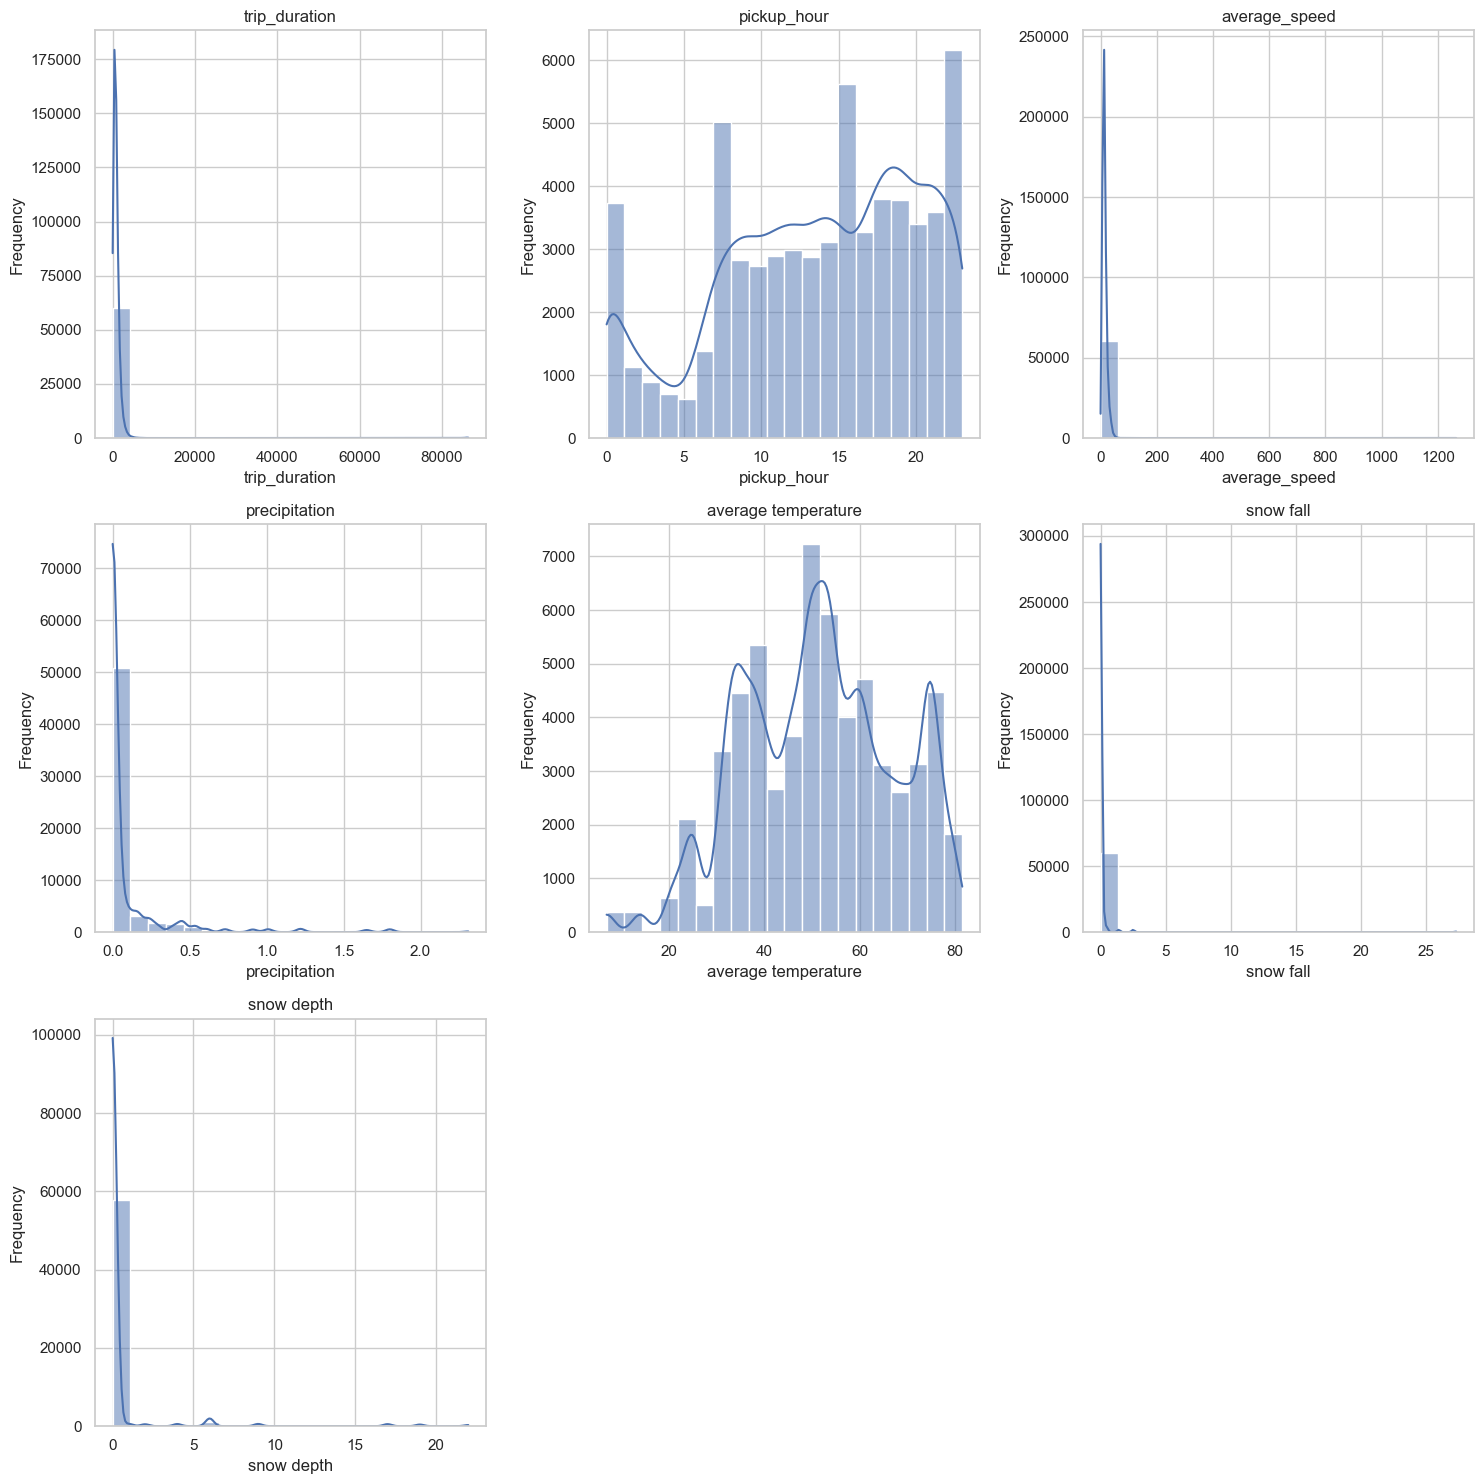

In [148]:
# List of all columns to visualize
columns_to_visualize = ['trip_duration', 'pickup_hour', 'average_speed', 'precipitation', 'average temperature', 'snow fall', 'snow depth']

# Set up the 3x3 plot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes

# Iterate through each column and create a histogram
for i, col in enumerate(columns_to_visualize):
    sns.histplot(combined_data[col], kde=True, ax=axes[i], bins=20, line_kws={'color': 'red'})
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if less than 9 columns)
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [149]:
df = combined_data.copy()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
df['is_outlier'] = df['trip_duration'].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Not Outlier')

df['is_outlier'].value_counts()

is_outlier
Not Outlier    57495
Outlier         3059
Name: count, dtype: int64

### Plot Non-Outliers

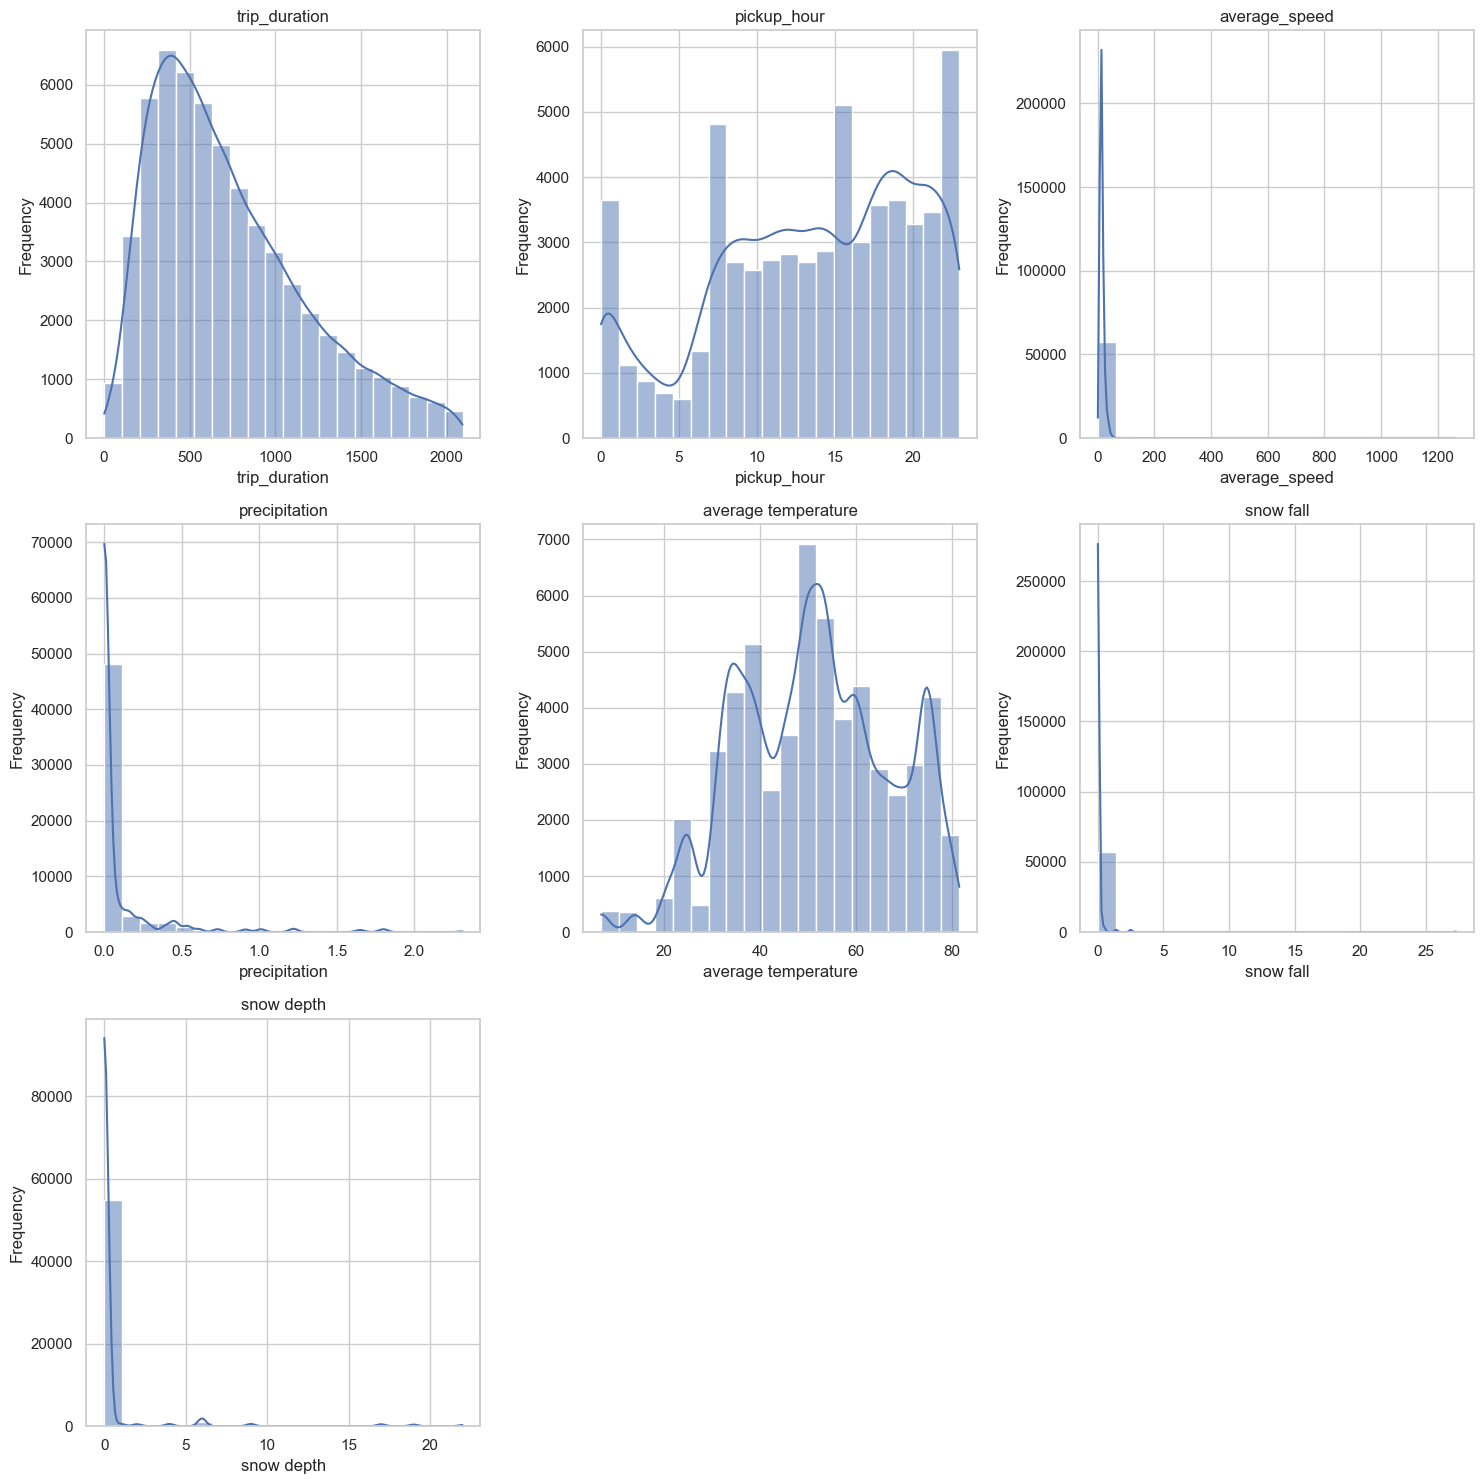

In [150]:
df1 = df.copy()
df1 = df1[df1['is_outlier'] == "Not Outlier"]

# Set up the 3x3 plot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes

# Iterate through each column and create a histogram
for i, col in enumerate(columns_to_visualize):
    sns.histplot(df1[col], kde=True, ax=axes[i], bins=20, line_kws={'color': 'red'})
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if less than 9 columns)
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Plot Outliers

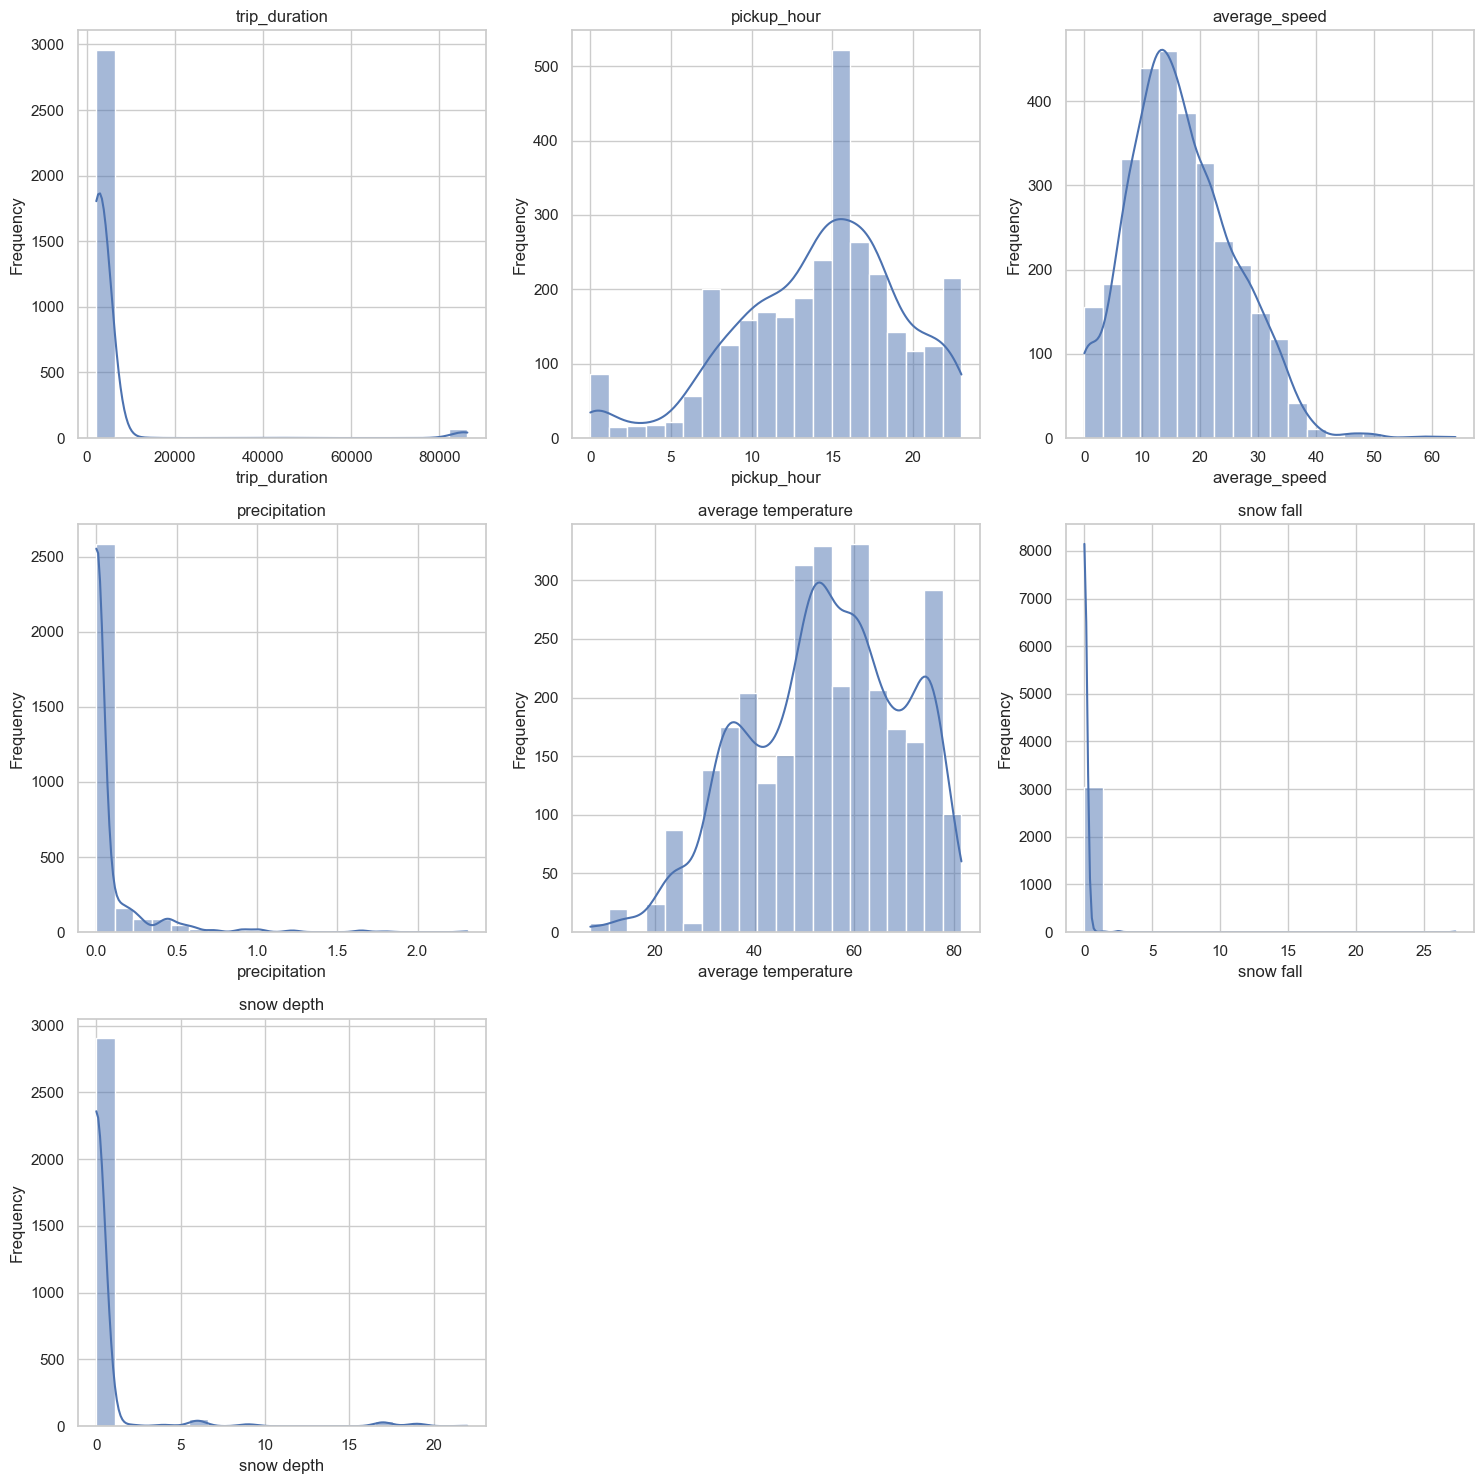

In [151]:
df1 = df.copy()
df1 = df1[df1['is_outlier'] == "Outlier"]

# Set up the 3x3 plot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 3x3 array of axes

# Iterate through each column and create a histogram
for i, col in enumerate(columns_to_visualize):
    sns.histplot(df1[col], kde=True, ax=axes[i], bins=20, line_kws={'color': 'red'})
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if less than 9 columns)
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Removing Outliers

In [152]:
trip_duration_threshold = 20000

combined_data = combined_data[combined_data['trip_duration'] < trip_duration_threshold].reset_index(drop = True)
print(f"Removed all observations from the dataset whose trip duration exceeds {trip_duration_threshold} seconds")

Removed all observations from the dataset whose trip duration exceeds 20000 seconds


# 4. Exploratory Data Analysis

## Traffic Volume Trends over Time

In [153]:
combined_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,precipitation,snow fall,snow depth,temperature_snow_interaction,precipitation_category,snowfall_category,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,0.29,0.0,0.000,0.0,"[0.09, 0.4]","[-0.001, 27.3]",40.778305,-73.980083,40.762094,-73.976539
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,0.00,0.0,0.000,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.727585,-73.985435,40.720205,-73.999900
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,0.00,0.0,0.001,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.758443,-73.973015,40.720205,-73.999900
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,0.00,0.0,0.000,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.708429,-74.005167,40.720205,-73.999900
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,0.00,0.0,0.000,0.0,"[-0.001, 0.01]","[-0.001, 27.3]",40.778305,-73.980083,40.783157,-73.956908


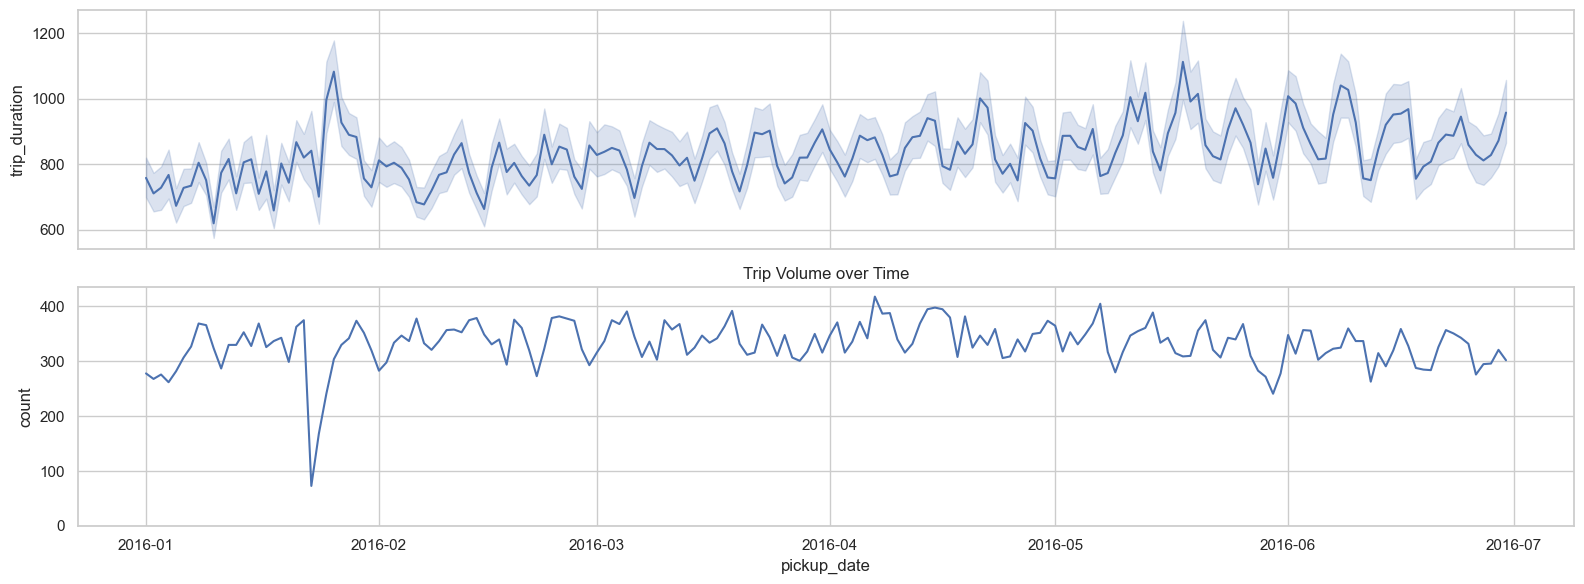

In [163]:
fig, axs = plt.subplots(2, 1, figsize = (16, 6), sharex=True)
axs = axes

sns.lineplot(combined_data, x = 'pickup_date', y = 'trip_duration', ax=axs[0])
plt.title("Trip Duration over Time")

tmp = combined_data.groupby('pickup_date')['vendor_id'].count().reset_index()
tmp.columns = ['pickup_date', 'count']
sns.lineplot(tmp, x = 'pickup_date', y = 'count', ax=axs[1])
plt.title("Trip Volume over Time")
plt.ylim(0)

plt.tight_layout()

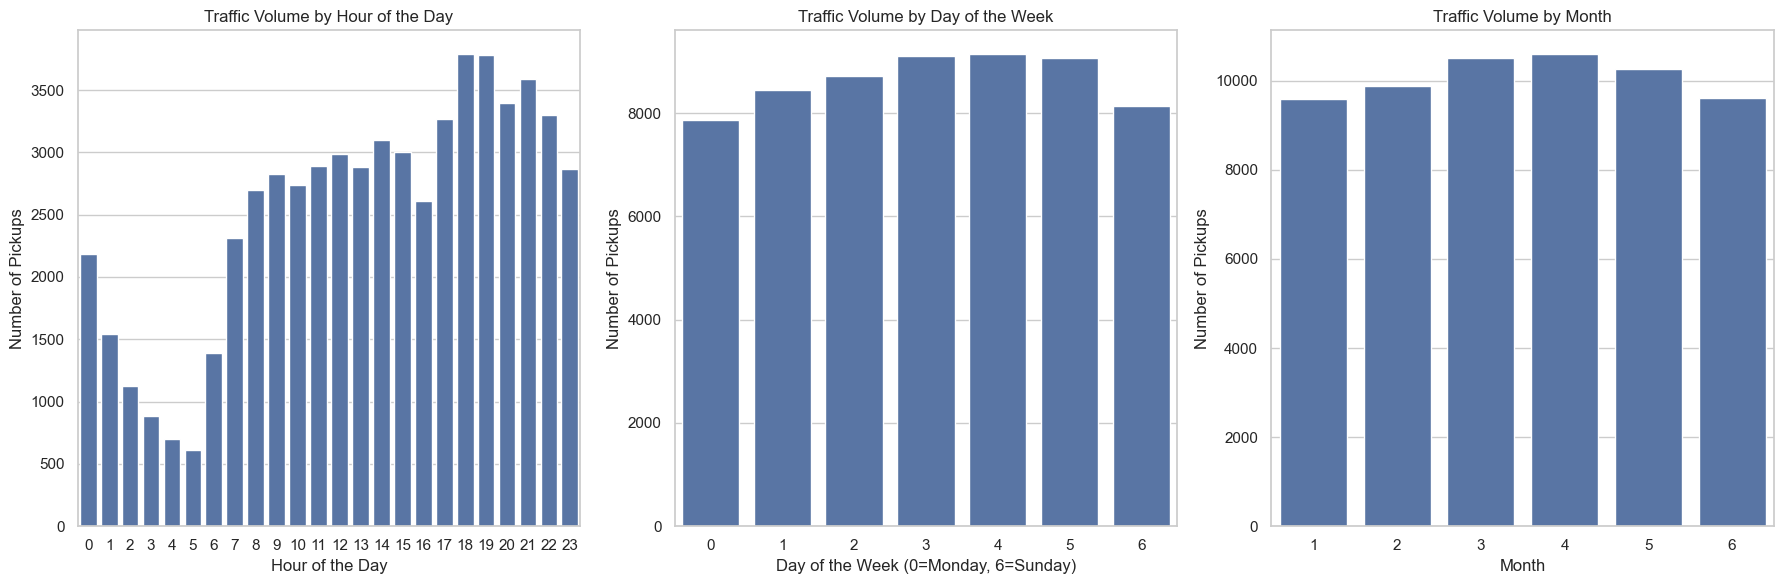

In [164]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Traffic volume by hour of the day
sns.countplot(data=combined_data, x='pickup_hour', ax=axs[0])
axs[0].set_title('Traffic Volume by Hour of the Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Number of Pickups')

# Traffic volume by day of the week
sns.countplot(data=combined_data, x='pickup_day_of_week', ax=axs[1])
axs[1].set_title('Traffic Volume by Day of the Week')
axs[1].set_xlabel('Day of the Week (0=Monday, 6=Sunday)')
axs[1].set_ylabel('Number of Pickups')

# Traffic volume by month
sns.countplot(data=combined_data, x='pickup_month', ax=axs[2])
axs[2].set_title('Traffic Volume by Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Number of Pickups')

plt.tight_layout()
plt.show()

## Geographic Analysis of Pickup and Dropoff Locations

In [165]:
# Calculate frequency of each pickup and dropoff cluster pairing
pairing_freq = combined_data.groupby(['pickup_cluster', 'dropoff_cluster']).size().reset_index(name='frequency')

# Sort pairings by frequency
pairing_freq = pairing_freq.sort_values(by='frequency', ascending=False)

In [166]:
# Calculate frequency of each pickup and dropoff cluster pairing
# pairing_freq = combined_data.groupby(['pickup_cluster', 'dropoff_cluster']).agg({'trip_duration': ['count','mean','median','std']}).reset_index()


# Sort pairings by frequency
#pairing_freq = pairing_freq.sort_values(by='frequency', ascending=False)
# pairing_freq

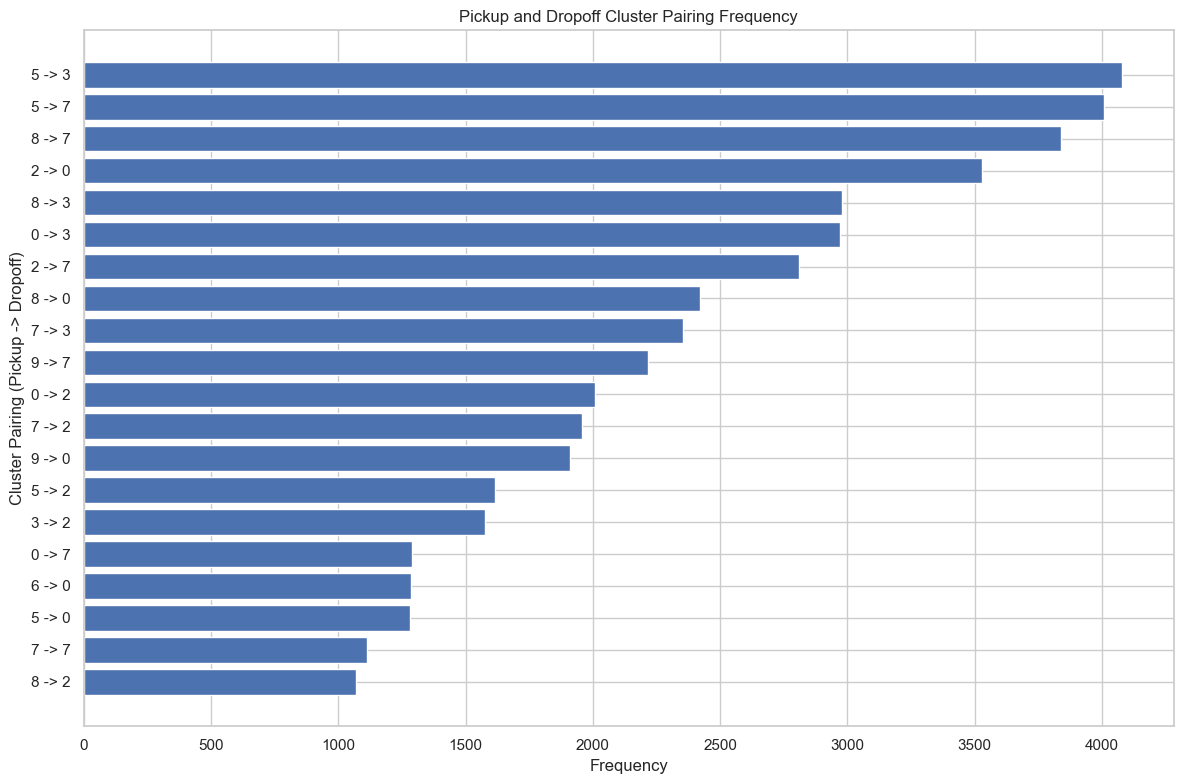

In [167]:
top = 20
tmp = pairing_freq.iloc[:top, :]

# Plot the pairing frequency chart
plt.figure(figsize=(12, 8))
plt.barh(tmp.apply(lambda x: f"{x['pickup_cluster']} -> {x['dropoff_cluster']}", axis=1), 
         tmp['frequency'])
plt.xlabel('Frequency')
plt.ylabel('Cluster Pairing (Pickup -> Dropoff)')
plt.title('Pickup and Dropoff Cluster Pairing Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [168]:
df1 = df.copy()

df1 = df1[df1['is_outlier'] == 'Not Outlier']

# Calculate straight line distance and average travel time between each cluster pair
pairing_info = df1.groupby(['pickup_cluster', 'dropoff_cluster']).agg({
    'pickup_centroid_latitude': 'first',
    'pickup_centroid_longitude': 'first',
    'dropoff_centroid_latitude': 'first',
    'dropoff_centroid_longitude': 'first',
    'trip_duration': 'median'
}).reset_index()

# Calculate straight line distance
pairing_info['distance_km'] = pairing_info.apply(lambda row: h.haversine_distance(
    row['pickup_centroid_latitude'], row['pickup_centroid_longitude'],
    row['dropoff_centroid_latitude'], row['dropoff_centroid_longitude']), axis=1)

pairing_info.sort_values(by = 'trip_duration', ascending = False).head(5)

,pickup_cluster,dropoff_cluster,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,trip_duration,distance_km
64,6,6,40.803712,-73.957377,40.693238,-74.184270,1984.0,25.453555
25,2,6,40.773986,-73.954614,40.693238,-74.184270,1946.0,25.655140
4,0,4,40.737542,-74.001040,40.662458,-73.781662,1906.0,24.503499
62,6,4,40.803712,-73.957377,40.662458,-73.781662,1875.0,20.019998
16,1,7,40.647201,-73.785129,40.762094,-73.976539,1849.0,21.577353


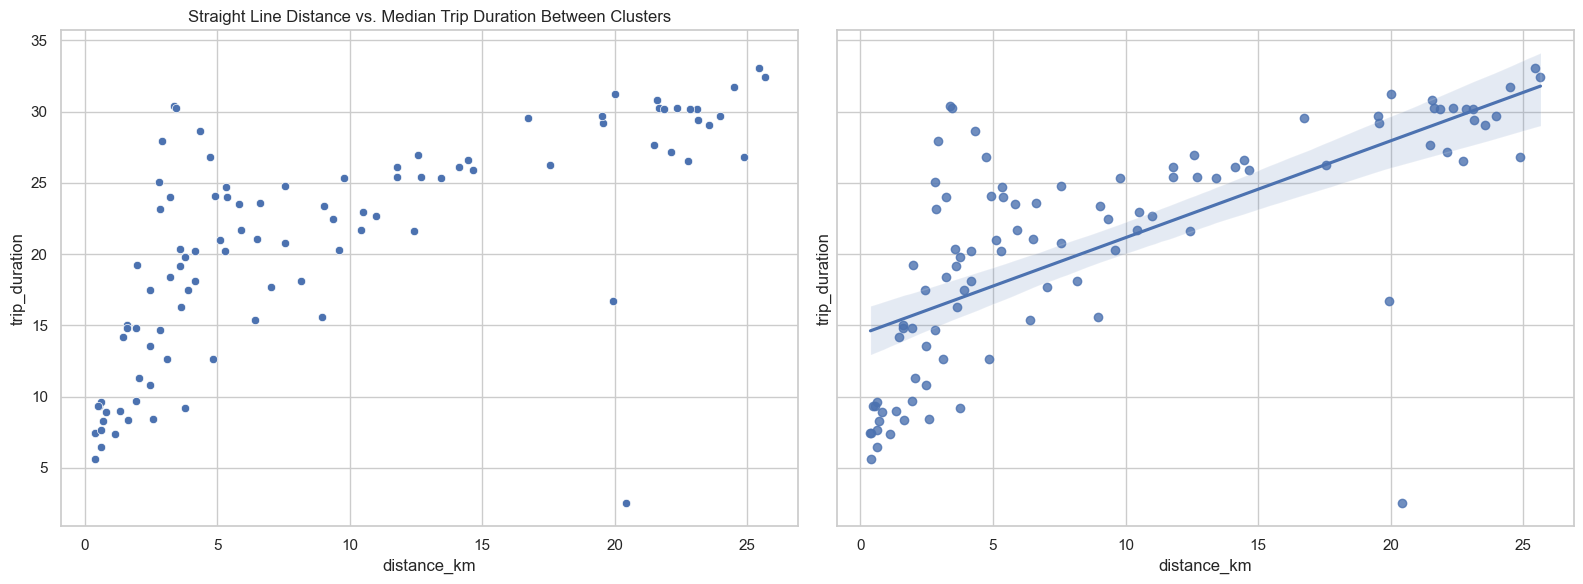

In [178]:

tmp = pairing_info.copy()
tmp['trip_duration'] = tmp['trip_duration'] / 60

fig, axs = plt.subplots(1, 2, figsize = (16, 6), sharey = True)
sns.scatterplot(tmp, x = 'distance_km', y = 'trip_duration', ax = axs[0])

#plt.scatter(pairing_info['distance_km'], pairing_info['trip_duration'] / 60, color='green', alpha=0.6, )
#axs[0].xlabel('Straight Line Distance (km)')
#plt.ylabel('Median Trip Duration (minutes)')
axs[0].set_title('Straight Line Distance vs. Median Trip Duration Between Clusters')
#plt.ylim(0)


sns.regplot(data = tmp, x = 'distance_km', y = 'trip_duration', ax = axs[1])
axs[0].set_title("Straight Line Distance vs. Median Trip Duration Between Clusters")
#plt.ylim(0)

plt.tight_layout()
plt.show()

In [122]:
# Define the base map centered around New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add pickup centroids to the map
for idx, row in pickup_centroids.iterrows():
    folium.Marker(
        location=[row['pickup_centroid_latitude'], row['pickup_centroid_longitude']],
        popup=f"Pickup Cluster {idx}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(nyc_map)

# Add dropoff centroids to the map
for idx, row in dropoff_centroids.iterrows():
    folium.Marker(
        location=[row['dropoff_centroid_latitude'], row['dropoff_centroid_longitude']],
        popup=f"Dropoff Cluster {idx}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(nyc_map)

# Save the map as an HTML file and display it
nyc_map.save("nyc_cluster_centroids_map.html")
nyc_map

## Impact of Weather Conditions on Traffic Volume

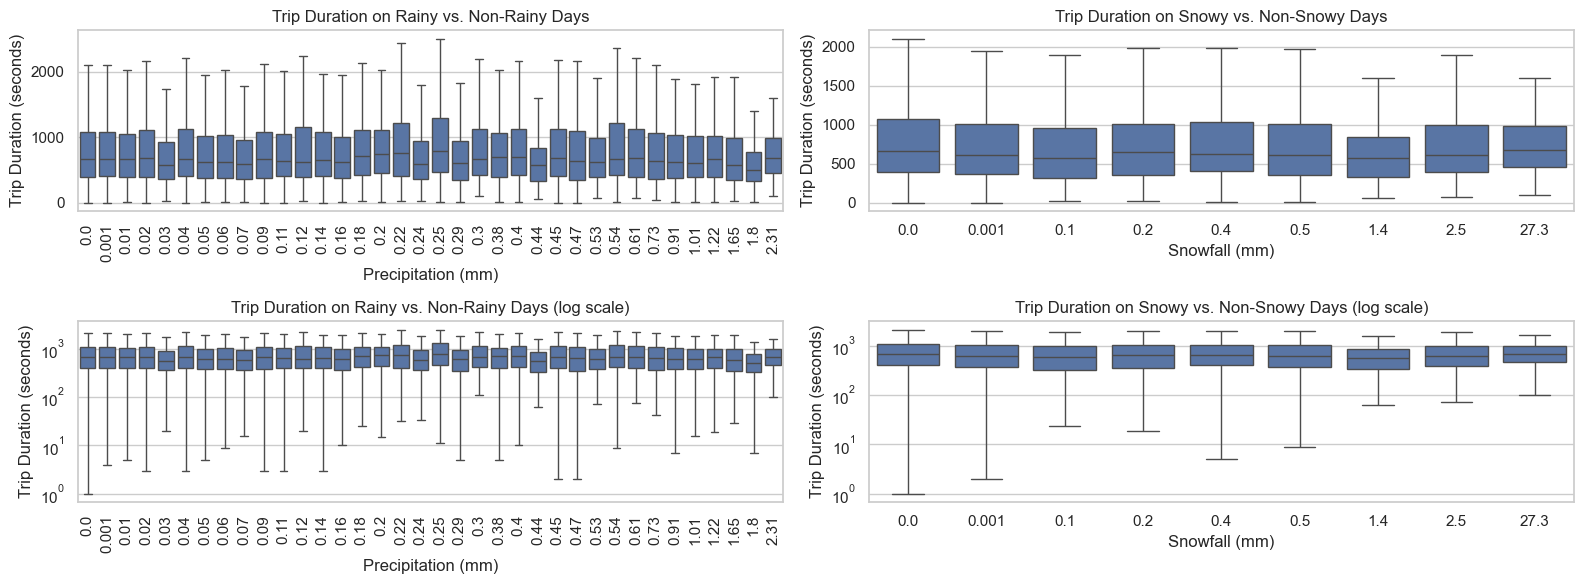

In [123]:
fig, axs = plt.subplots(2, 2, figsize=(16, 6))
axs = axs.flatten()

# Traffic volume on rainy vs. non-rainy days
sns.boxplot(data=combined_data, x='precipitation', y='trip_duration', showfliers=False, ax=axs[0])
axs[0].set_title('Trip Duration on Rainy vs. Non-Rainy Days')
axs[0].set_xlabel('Precipitation (mm)')
axs[0].set_ylabel('Trip Duration (seconds)')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)
#axs[0].set_yscale('log')  # Use log scale to handle wide range of trip durations

# Traffic volume on snowy vs. non-snowy days
sns.boxplot(data=combined_data, x='snow fall', y='trip_duration', showfliers=False, ax=axs[1])
axs[1].set_title('Trip Duration on Snowy vs. Non-Snowy Days')
axs[1].set_xlabel('Snowfall (mm)')
axs[1].set_ylabel('Trip Duration (seconds)')
#axs[1].set_yscale('log')  # Use log scale to handle wide range of trip durations


# Traffic volume on rainy vs. non-rainy days
sns.boxplot(data=combined_data, x='precipitation', y='trip_duration', showfliers=False, ax=axs[2])
axs[2].set_title('Trip Duration on Rainy vs. Non-Rainy Days (log scale)')
axs[2].set_xlabel('Precipitation (mm)')
axs[2].set_ylabel('Trip Duration (seconds)')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 90)
axs[2].set_yscale('log')  # Use log scale to handle wide range of trip durations


# Traffic volume on snowy vs. non-snowy days
sns.boxplot(data=combined_data, x='snow fall', y='trip_duration', showfliers=False, ax=axs[3])
axs[3].set_title('Trip Duration on Snowy vs. Non-Snowy Days (log scale)')
axs[3].set_xlabel('Snowfall (mm)')
axs[3].set_ylabel('Trip Duration (seconds)')
axs[3].set_yscale('log')  # Use log scale to handle wide range of trip durations

plt.tight_layout()
plt.show()


## Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap of Key Features')

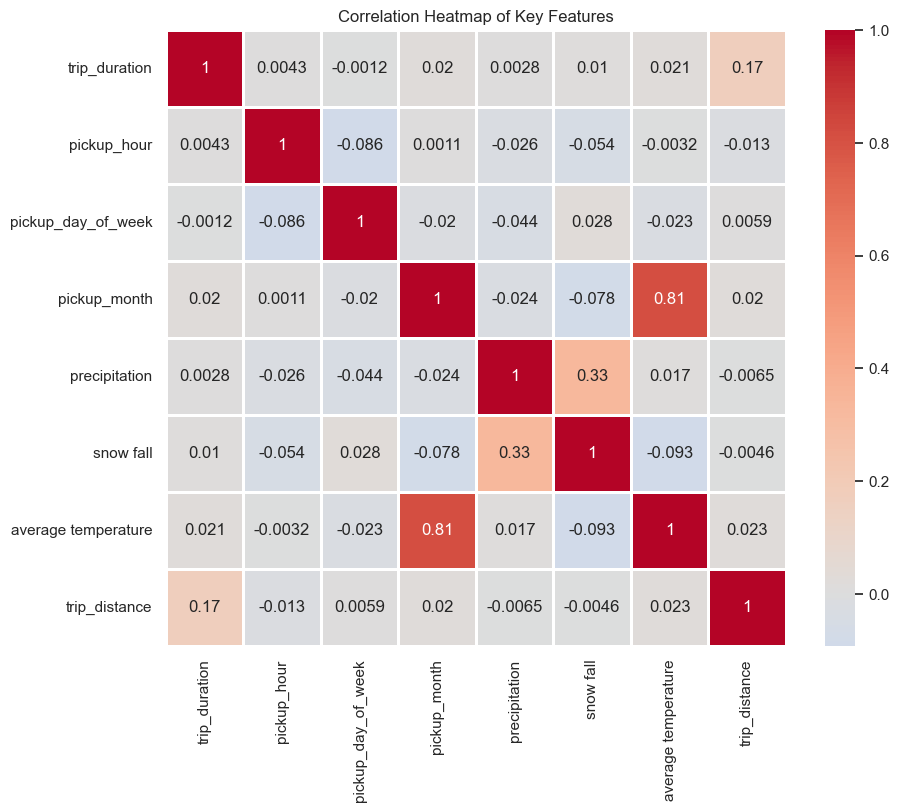

In [27]:
plt.figure(figsize=(10, 8))

# Select relevant numerical features
corr_features = combined_data[['trip_duration', 'pickup_hour', 'pickup_day_of_week', 'pickup_month', 
                               'precipitation', 'snow fall', 'average temperature', 'trip_distance']]

# Calculate the correlation matrix
corr_matrix = corr_features.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=2)
plt.title('Correlation Heatmap of Key Features')

## Anomaly Detection in Trip Duration

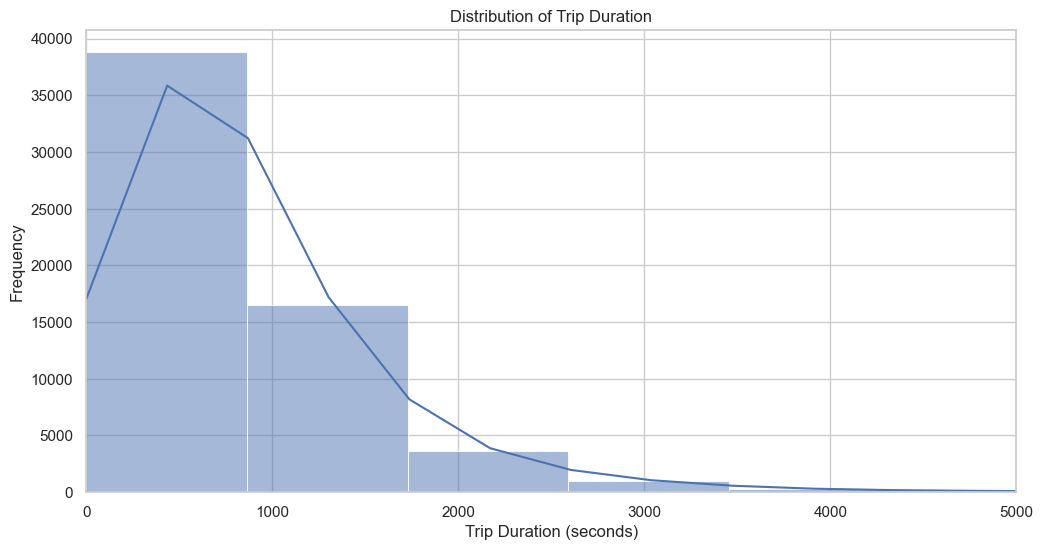

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='trip_duration', bins=100, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0, 5000)  # Limiting the x-axis to focus on shorter trips for clarity
plt.show()

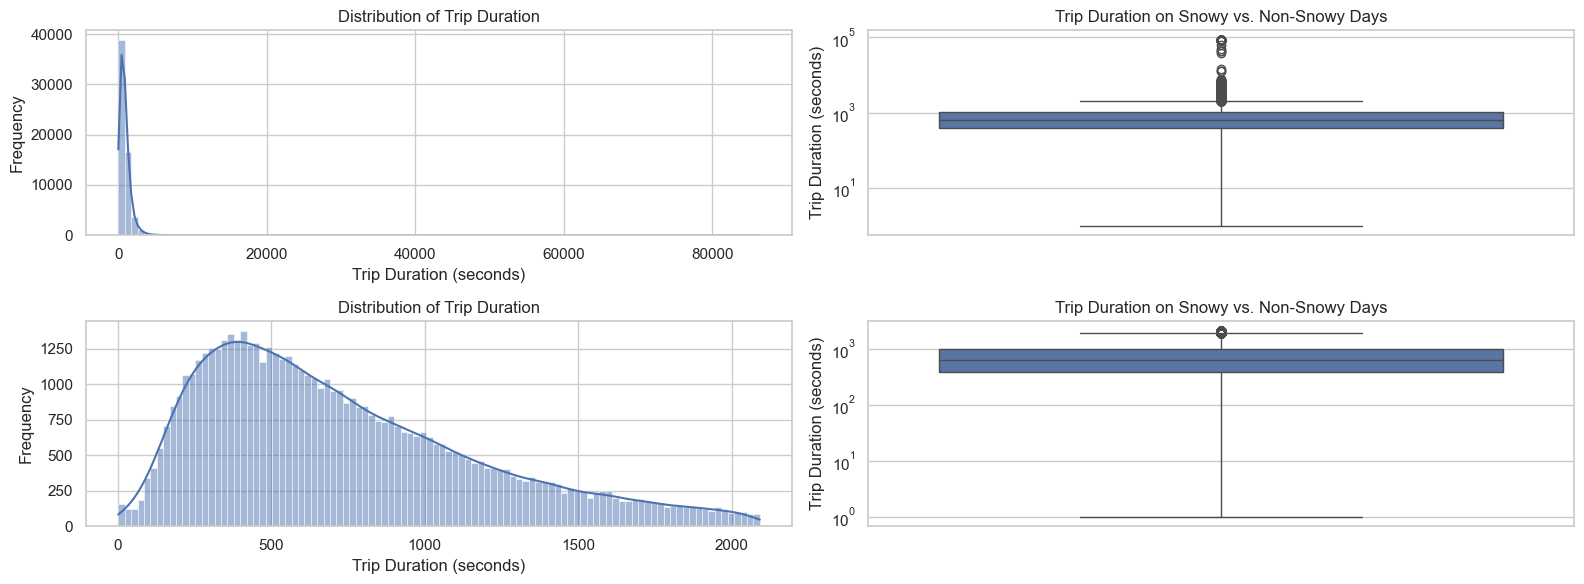

In [63]:
df1 = df.copy()
df1 = df1[df1['is_outlier'] == "Not Outlier"]


fig, axs = plt.subplots(2, 2, figsize=(16, 6))
axs = axs.flatten()

# Traffic volume on rainy vs. non-rainy days
sns.histplot(data=combined_data, x='trip_duration', bins=100, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Trip Duration')
axs[0].set_xlabel('Trip Duration (seconds)')
axs[0].set_ylabel('Frequency')


# Traffic volume on snowy vs. non-snowy days
sns.boxplot(data=combined_data, y='trip_duration', ax=axs[1])
axs[1].set_title('Trip Duration on Snowy vs. Non-Snowy Days')
axs[1].set_ylabel('Trip Duration (seconds)')
axs[1].set_yscale('log')  # Use log scale to handle wide range of trip durations



# Traffic volume on rainy vs. non-rainy days
sns.histplot(data=df1, x='trip_duration', bins=100, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Trip Duration')
axs[2].set_xlabel('Trip Duration (seconds)')
axs[2].set_ylabel('Frequency')


# Traffic volume on snowy vs. non-snowy days
sns.boxplot(data=df1, y='trip_duration', ax=axs[3])
axs[3].set_title('Trip Duration on Snowy vs. Non-Snowy Days')
axs[3].set_ylabel('Trip Duration (seconds)')
axs[3].set_yscale('log')  # Use log scale to handle wide range of trip durations


plt.tight_layout()
plt.show()

# 5. Impact Analysis of Weather Conditions

## Plot 1: Relationship Between Precipitation and Traffic Volume

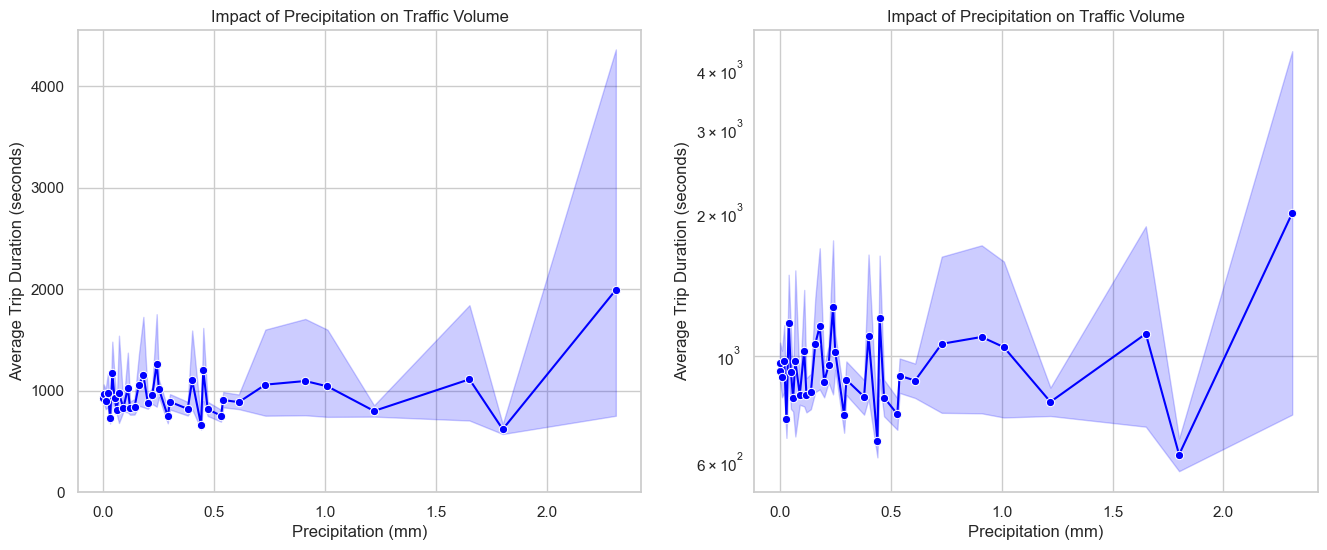

In [30]:
# Average traffic volume for different levels of precipitation
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

sns.lineplot(data=combined_data, x='precipitation', y='trip_duration', marker='o', color='blue')
plt.title('Impact of Precipitation on Traffic Volume')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Average Trip Duration (seconds)')
plt.ylim(0)

plt.subplot(1, 2, 2)
sns.lineplot(data=combined_data, x='precipitation', y='trip_duration', marker='o', color='blue')
plt.title('Impact of Precipitation on Traffic Volume')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Average Trip Duration (seconds)')
plt.yscale('log')  # Log scale to manage wide range of trip durations

plt.show()


## Plot 2: Relationship Between Snowfall and Traffic Volume

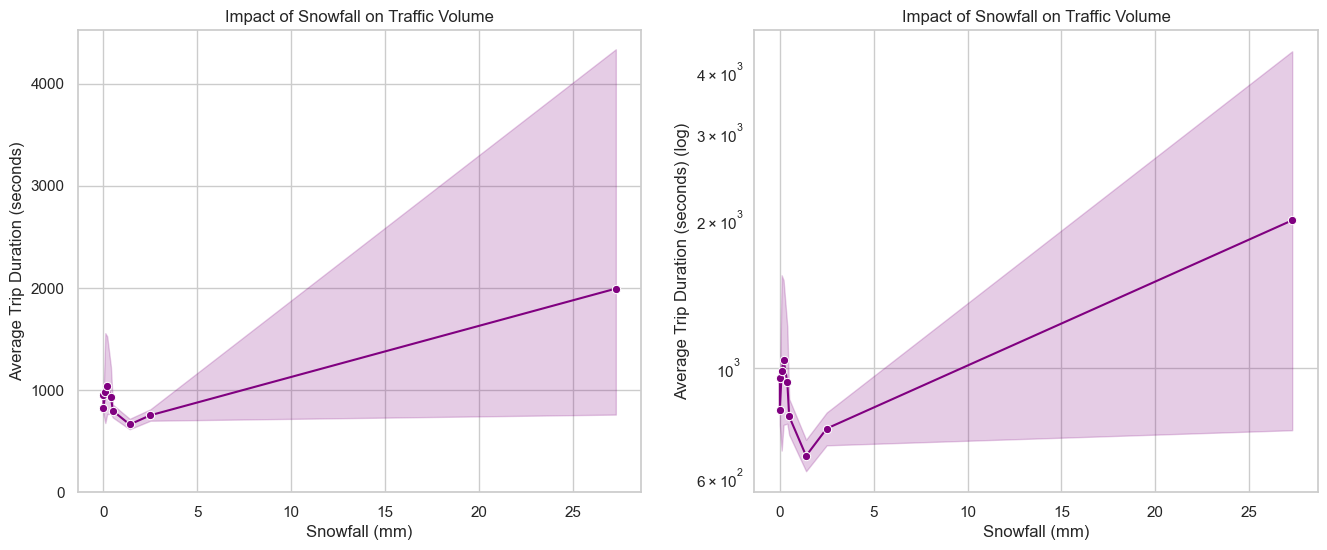

In [31]:
# Average traffic volume for different levels of snowfall
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=combined_data, x='snow fall', y='trip_duration', marker='o', color='purple')
plt.title('Impact of Snowfall on Traffic Volume')
plt.xlabel('Snowfall (mm)')
plt.ylabel('Average Trip Duration (seconds)')
plt.ylim(0)
#plt.yscale('log')  # Log scale to manage wide range of trip durations

plt.subplot(1, 2, 2)
sns.lineplot(data=combined_data, x='snow fall', y='trip_duration', marker='o', color='purple')
plt.title('Impact of Snowfall on Traffic Volume')
plt.xlabel('Snowfall (mm)')
plt.ylabel('Average Trip Duration (seconds) (log)')
plt.yscale('log')  # Log scale to manage wide range of trip durations

plt.show()

## Plot 3: Relationship Between Temperature and Traffic Volume

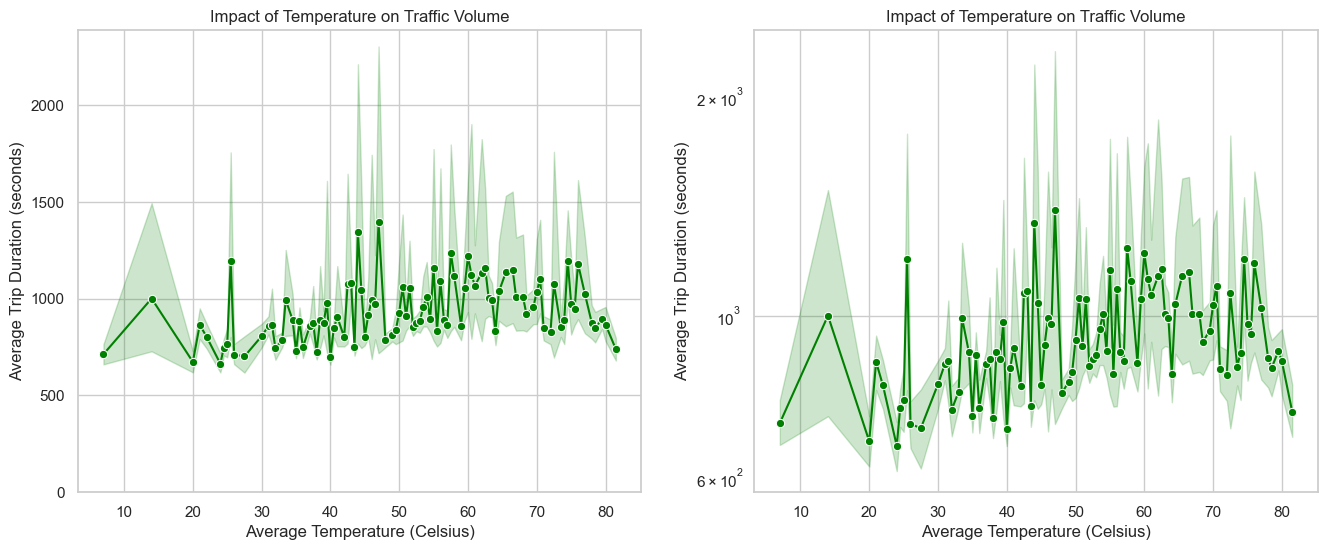

In [32]:
# Average traffic volume for different levels of average temperature
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=combined_data, x='average temperature', y='trip_duration', marker='o', color='green')
plt.title('Impact of Temperature on Traffic Volume')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Average Trip Duration (seconds)')
plt.ylim(0)


plt.subplot(1, 2, 2)
sns.lineplot(data=combined_data, x='average temperature', y='trip_duration', marker='o', color='green')
plt.title('Impact of Temperature on Traffic Volume')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Average Trip Duration (seconds)')
plt.yscale('log')  # Log scale to manage wide range of trip durations

plt.show()

## Analyzing Sensitivity to Weather Precipitation

In [33]:
df1 = df.copy()
df1 = df1[df1['is_outlier'] == "Not Outlier"]

# Group by pickup and dropoff clusters, calculate average trip duration and average precipitation
cluster_weather_data = df1.groupby(['pickup_cluster', 'dropoff_cluster']).agg({
    'trip_duration': 'mean',
    'precipitation': 'mean'
}).reset_index()

# Calculate the average trip duration for different levels of precipitation within each cluster pairing
cluster_precipitation_effect = df1.groupby(['pickup_cluster', 'dropoff_cluster', 'precipitation']).agg({
    'trip_duration': 'mean'
}).reset_index()

print(cluster_precipitation_effect.head())


   pickup_cluster  dropoff_cluster  precipitation  trip_duration
0               0                0          0.000    1269.460317
1               0                0          0.001    1344.264706
2               0                0          0.010    1567.285714
3               0                0          0.020    1237.777778
4               0                0          0.030     959.666667


In [34]:
# Create a list to store correlation results
sensitivity_list = []

# Calculate correlation between precipitation and trip duration for each cluster pairing
for cluster_pair, group in combined_data.groupby(['pickup_cluster', 'dropoff_cluster']):
    correlation = group['trip_duration'].corr(group['precipitation'])
    sensitivity_list.append({
        'pickup_cluster': cluster_pair[0],
        'dropoff_cluster': cluster_pair[1],
        'correlation': correlation
    })

# Convert the list to a DataFrame
sensitivity_df = pd.DataFrame(sensitivity_list)

# Sort by the absolute value of correlation to find most sensitive pairings
sensitivity_df['abs_correlation'] = sensitivity_df['correlation'].abs()
sensitivity_df = sensitivity_df.sort_values(by='abs_correlation', ascending=False)

print(sensitivity_df.head())


    pickup_cluster  dropoff_cluster  correlation  abs_correlation
96               9                6     0.885889         0.885889
16               1                6    -0.737027         0.737027
24               2                4     0.492056         0.492056
6                0                6    -0.447111         0.447111
69               6                9     0.405548         0.405548


In [35]:
# Create a list to store regression results
regression_results = []

# Perform regression analysis for each cluster pairing
for cluster_pair, group in combined_data.groupby(['pickup_cluster', 'dropoff_cluster']):
    if len(group) > 10:  # Ensure sufficient data points for regression
        X = group[['precipitation']]
        y = group['trip_duration']
        X = sm.add_constant(X)  # Add an intercept term
        model = sm.OLS(y, X).fit()
        regression_results.append({
            'pickup_cluster': cluster_pair[0],
            'dropoff_cluster': cluster_pair[1],
            'precipitation_coef': model.params['precipitation'],
            'p_value': model.pvalues['precipitation'],
            'r_squared': model.rsquared
        })

# Convert the results to a DataFrame
regression_df = pd.DataFrame(regression_results)

# Sort by the magnitude of the precipitation coefficient to identify sensitivity
regression_df['abs_precipitation_coef'] = regression_df['precipitation_coef'].abs()
regression_df = regression_df.sort_values(by='abs_precipitation_coef', ascending=False)

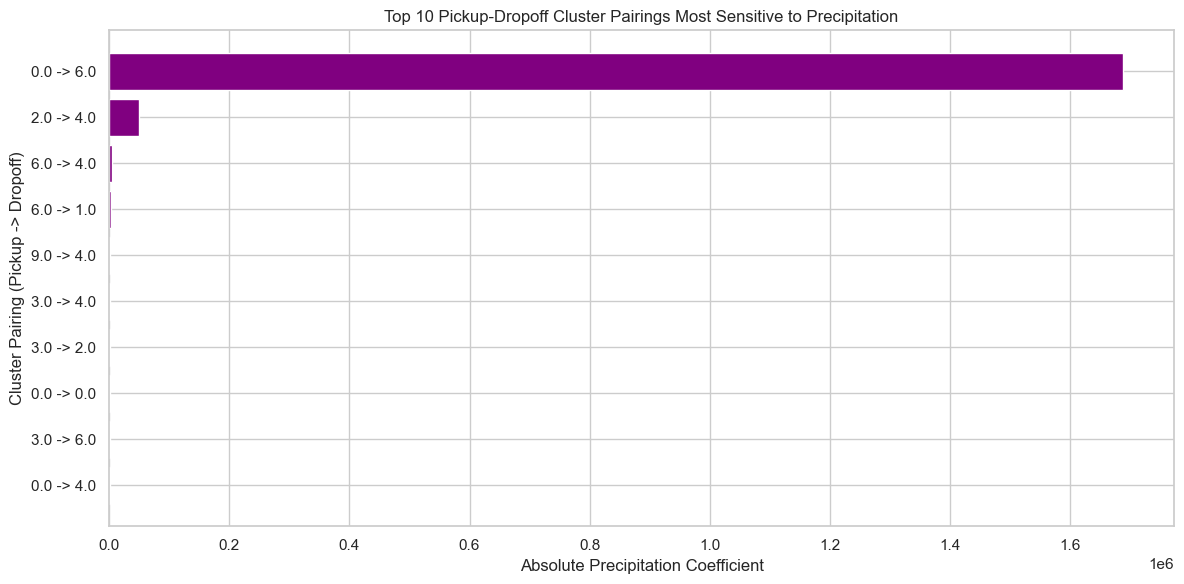

In [36]:
# Plot the top 10 most sensitive pairings based on regression analysis
top_sensitive_pairings = regression_df.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_sensitive_pairings.apply(lambda x: f"{x['pickup_cluster']} -> {x['dropoff_cluster']}", axis=1),
         top_sensitive_pairings['abs_precipitation_coef'], color='purple')
plt.xlabel('Absolute Precipitation Coefficient')
plt.ylabel('Cluster Pairing (Pickup -> Dropoff)')
plt.title('Top 10 Pickup-Dropoff Cluster Pairings Most Sensitive to Precipitation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Regression Analysis: Quantifying the Impact of Weather on Trip Duration

### Model 1

In [37]:
# Prepare the data for regression analysis
# Selecting relevant features: precipitation, snow fall, average temperature
X = combined_data[['precipitation', 'snow fall', 'average temperature']]
y = combined_data['trip_duration']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.97
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           7.88e-08
Time:                        12:09:22   Log-Likelihood:            -5.7181e+05
No. Observations:               60554   AIC:                         1.144e+06
Df Residuals:                   60550   BIC:                         1.144e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 718.7936    

### Model 2

In [38]:
# Prepare the data for regression analysis with additional features
X = combined_data[['precipitation', 'snow fall', 'average temperature', 
                   'pickup_hour', 'pickup_day_of_week', 'is_weekend', 'is_rush_hour', 
                   'trip_distance', 'passenger_count']]
y = combined_data['trip_duration']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model with additional features
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis with additional features
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     199.2
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:09:22   Log-Likelihood:            -5.7094e+05
No. Observations:               60554   AIC:                         1.142e+06
Df Residuals:                   60544   BIC:                         1.142e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 177.8550    

### Model 3

In [39]:
# Prepare data for regression with additional features
X = combined_data[['precipitation', 'snow fall', 'average temperature', 'pickup_hour', 'pickup_day_of_week', 
                   'is_weekend', 'is_rush_hour', 'trip_distance', 'passenger_count', 'day_of_year', 
                   'holiday_indicator', 'temperature_snow_interaction']]
y = combined_data['trip_duration']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model with additional features
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis with additional features
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:09:23   Log-Likelihood:            -5.7094e+05
No. Observations:               60554   AIC:                         1.142e+06
Df Residuals:                   60542   BIC:                         1.142e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 4: Lasso

In [40]:
features = ['precipitation', 'snow fall', 'average temperature', 'pickup_hour', 'pickup_day_of_week', 
            'is_weekend', 'is_rush_hour', 'trip_distance', 'passenger_count', 'day_of_year', 
            'holiday_indicator', 'temperature_snow_interaction']

X = combined_data[features]
y = combined_data['trip_duration']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit LASSO regression using cross-validation to select the best alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Get the coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=features)

# Display the coefficients
print("LASSO Coefficients:")
print(lasso_coefficients)

# Identify and print the most impactful features (non-zero coefficients)
important_features = lasso_coefficients[lasso_coefficients != 0]
print("\nMost Impactful Features (Non-zero Coefficients):")
print(important_features)

LASSO Coefficients:
precipitation                     0.000000
snow fall                        -0.000000
average temperature              37.565923
pickup_hour                       1.143063
pickup_day_of_week               -0.000000
is_weekend                       -3.283815
is_rush_hour                     34.004413
trip_distance                   494.962923
passenger_count                  19.722370
day_of_year                      20.651801
holiday_indicator                 0.000000
temperature_snow_interaction     -0.000000
dtype: float64

Most Impactful Features (Non-zero Coefficients):
average temperature     37.565923
pickup_hour              1.143063
is_weekend              -3.283815
is_rush_hour            34.004413
trip_distance          494.962923
passenger_count         19.722370
day_of_year             20.651801
dtype: float64


In [41]:
key_features = list(important_features.index)

# Prepare data for regression with additional features
X = combined_data[key_features]
y = combined_data['trip_duration']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model with additional features
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis with additional features
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     254.5
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:09:23   Log-Likelihood:            -5.7095e+05
No. Observations:               60554   AIC:                         1.142e+06
Df Residuals:                   60546   BIC:                         1.142e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 250.0873    

### Model 5: Random Forest

Mean Squared Error (MSE): 9788999.963768864
R-squared (R2): -0.1816399326504734

Feature Importance:
                         Feature  Importance
7                  trip_distance    0.643628
3                    pickup_hour    0.102202
9                    day_of_year    0.069554
8                passenger_count    0.052388
2            average temperature    0.052286
0                  precipitation    0.031522
4             pickup_day_of_week    0.021620
6                   is_rush_hour    0.010529
5                     is_weekend    0.008656
11  temperature_snow_interaction    0.003926
1                      snow fall    0.003689
10             holiday_indicator    0.000000


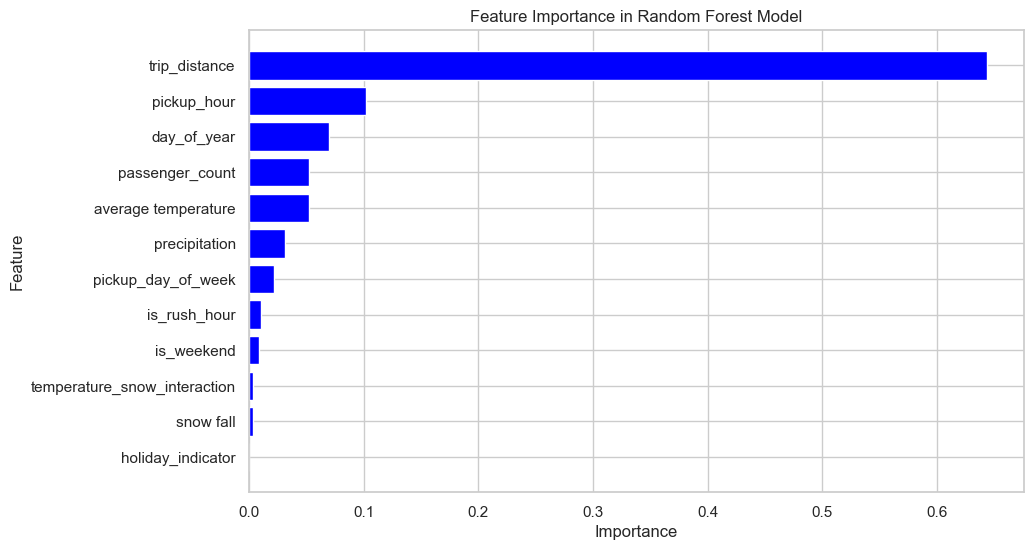

In [42]:
# Prepare the data (assuming 'combined_data' already contains additional features)
# Define the feature set and target variable
features = ['precipitation', 'snow fall', 'average temperature', 'pickup_hour', 'pickup_day_of_week', 
            'is_weekend', 'is_rush_hour', 'trip_distance', 'passenger_count', 'day_of_year', 
            'holiday_indicator', 'temperature_snow_interaction']

X = combined_data[features]
y = combined_data['trip_duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Feature Importance
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# 6. Predictive Modeling

## Predicting trip duration


Linear Regression Performance:
Mean Squared Error (MSE): 8022500.03971003
Mean Absolute Error (MAE): 418.22760730902183
R-squared (R2): 0.0315960321076969

Decision Tree Performance:
Mean Squared Error (MSE): 21187306.5795123
Mean Absolute Error (MAE): 581.2512797930314
R-squared (R2): -1.5575408736666114

Random Forest Performance:
Mean Squared Error (MSE): 9788999.963768864
Mean Absolute Error (MAE): 478.5235837389615
R-squared (R2): -0.1816399326504734

Gradient Boosting Performance:
Mean Squared Error (MSE): 8370916.570523326
Mean Absolute Error (MAE): 397.36513223901363
R-squared (R2): -0.010461674249268471

Model Performance Summary:
                            MSE         MAE        R2
Linear Regression  8.022500e+06  418.227607  0.031596
Decision Tree      2.118731e+07  581.251280 -1.557541
Random Forest      9.789000e+06  478.523584 -0.181640
Gradient Boosting  8.370917e+06  397.365132 -0.010462


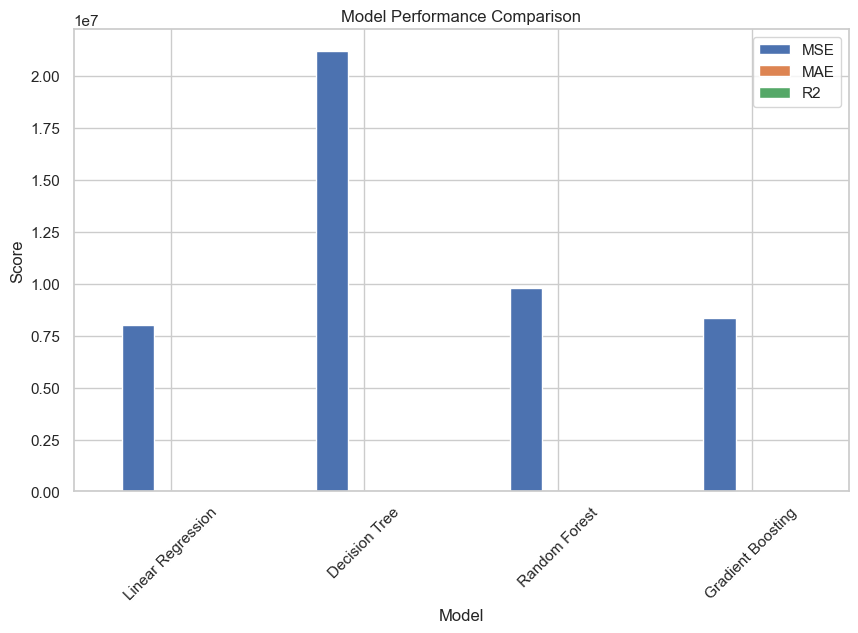

In [43]:
# Prepare the data (assuming 'combined_data' already contains additional features)
# Define the feature set and target variable
features = ['precipitation', 'snow fall', 'average temperature', 'pickup_hour', 'pickup_day_of_week', 
            'is_weekend', 'is_rush_hour', 'trip_distance', 'passenger_count', 'day_of_year', 
            'holiday_indicator', 'temperature_snow_interaction']

X = combined_data[features]
y = combined_data['trip_duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    model_performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

# Display the performance of all models
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Summary:")
print(performance_df)

# Visualize model performance
performance_df[['MSE', 'MAE', 'R2']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

## Predicting traffic volume

In [44]:
# Group by date and hour to calculate traffic volume
traffic_volume_data = combined_data.groupby(['pickup_date', 'pickup_hour']).size().reset_index(name='traffic_volume')

# Merge traffic volume data back with weather data (assuming weather data is already merged into combined_data)
traffic_volume_data = pd.merge(traffic_volume_data, combined_data.drop_duplicates(subset=['pickup_date', 'pickup_hour']), 
                               on=['pickup_date', 'pickup_hour'], how='left')


Linear Regression Performance:
Mean Squared Error (MSE): 31.38445376819637
Mean Absolute Error (MAE): 4.526283947246061
R-squared (R2): 0.3528191785599428

Decision Tree Performance:
Mean Squared Error (MSE): 35.913513513513514
Mean Absolute Error (MAE): 4.559073359073359
R-squared (R2): 0.2594251488924355

Random Forest Performance:
Mean Squared Error (MSE): 20.69591142857143
Mean Absolute Error (MAE): 3.442617760617761
R-squared (R2): 0.573228291378886

Gradient Boosting Performance:
Mean Squared Error (MSE): 17.57666105949695
Mean Absolute Error (MAE): 3.2792784498417498
R-squared (R2): 0.6375505520447863

Model Performance Summary:
                         MSE       MAE        R2
Linear Regression  31.384454  4.526284  0.352819
Decision Tree      35.913514  4.559073  0.259425
Random Forest      20.695911  3.442618  0.573228
Gradient Boosting  17.576661  3.279278  0.637551


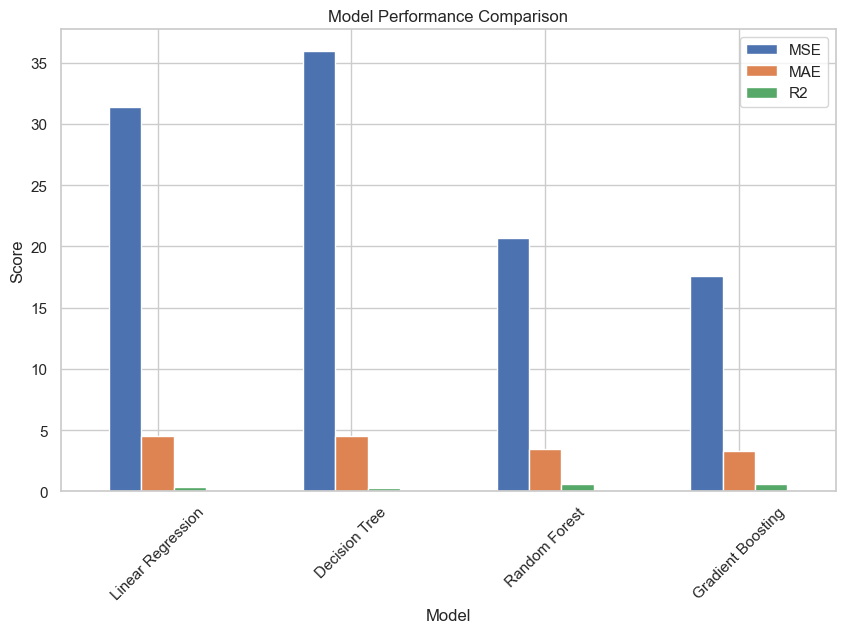

In [45]:

# Define the feature set and target variable
features = ['precipitation', 'snow fall', 'average temperature', 'pickup_hour', 
            'is_weekend', 'is_rush_hour', 'day_of_year', 'holiday_indicator', 
            'temperature_snow_interaction']

X = traffic_volume_data[features]
y = traffic_volume_data['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    model_performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

# Display the performance of all models
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Summary:")
print(performance_df)

# Visualize model performance
performance_df[['MSE', 'MAE', 'R2']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# 7. Strategic Recommendations for Traffic Management

1. Implement Dynamic Traffic Control Measures
Rush Hour Management: The analysis shows that trips during rush hours are significantly longer. Implementing dynamic traffic signal control systems that adjust signal timings based on real-time traffic data could help alleviate congestion during peak hours.
Dedicated Rush Hour Lanes: Consider dedicated lanes for high-occupancy vehicles (HOV) or public transport during peak hours. This can encourage carpooling and the use of public transportation, reducing the number of vehicles on the road.
2. Weather-Responsive Traffic Management
Snowfall and Rain Response Plans: Since snowfall and, to a lesser extent, rain, significantly impact trip durations, develop response plans for different weather conditions. This can include:
Pre-treatment of roads with salt and sand before snowfall.
Deployment of snow plows in high-traffic areas based on predicted snow clusters.
Adjusting speed limits dynamically based on visibility and road conditions to enhance safety.
Weather Forecast Integration: Integrate weather forecasts into traffic management systems to predict and proactively manage potential congestion caused by adverse weather conditions.
3. Traffic Volume Prediction and Real-Time Alerts
Predictive Traffic Management: Utilize the predictive models developed to forecast traffic volume and identify potential congestion points. Traffic authorities can use these predictions to preemptively manage traffic flow.
Real-Time Traffic Alerts: Implement a system that provides real-time traffic alerts to drivers via mobile apps or electronic road signs. Alerts can suggest alternative routes based on current traffic conditions and predicted congestion.
4. Encourage Off-Peak Travel
Incentives for Off-Peak Travel: Encourage businesses and educational institutions to adopt flexible working hours. Offering incentives for off-peak travel, such as reduced tolls or parking fees, can help distribute traffic more evenly throughout the day.
Congestion Pricing: Consider implementing congestion pricing in highly congested areas, charging higher fees for entering certain zones during peak hours. This can discourage unnecessary trips and reduce traffic volume.
5. Improve Public Transportation Infrastructure
Enhance Public Transit Options: Investing in expanding and improving public transportation (e.g., buses, subways) can provide reliable alternatives to private car use. Increasing the frequency and coverage of public transport during peak hours can reduce the reliance on private vehicles.
Park-and-Ride Facilities: Develop more park-and-ride facilities on the outskirts of the city. This allows commuters to park their vehicles and use public transportation to reach their final destinations, reducing traffic in city centers.
6. Traffic Monitoring and Feedback Systems
Install More Traffic Sensors: Expand the network of traffic sensors and cameras to collect real-time data across more locations. This data can be used for continuous monitoring and updating predictive models.
Feedback Mechanisms: Establish platforms where citizens can report traffic issues and receive feedback. Engaging the public in reporting traffic congestion and problems helps in quickly identifying and resolving bottlenecks.
7. Utilize Clustering for Traffic Analysis
High Traffic Areas: Use clustering analysis to identify high traffic pickup and dropoff areas. Prioritize these areas for targeted traffic management measures, such as better signage, road expansions, or traffic wardens during peak times.
Event-Based Traffic Management: Special events (e.g., sports games, parades) can cause localized congestion. By using cluster analysis to understand event-specific traffic patterns, city planners can deploy traffic officers and set up temporary traffic controls to manage event-related congestion.
8. Public Awareness and Education
Campaigns on Traffic Etiquette: Educate drivers on proper traffic etiquette, such as avoiding blocking intersections, proper lane usage, and the importance of following traffic signals.
Promote Safe Driving in Adverse Weather: Public campaigns focusing on safe driving practices during rainy or snowy conditions can reduce accidents and improve overall traffic flow.

# 8. Conclusion

Thanks for reading the report to the end!